# Risk Management Classification

Name: Tan Wen Tao Bryan <br>
Admin No: P2214449 <br>
Class: DAAA/FT/2A/01<br>

-------------------------------------------------------------------------------------------------------------------------------

# Project Objective

- To build a classification model to predict which customer will have default payment in the next month from the perspective of risk management

# Index
1.  Exploratory Data Analysis<br>
    1.1 Data Exploration<br>
    1.2 Data Visualisation<br>
2.  Data Cleaning/Feature Engineering<br>
3.  Model Selection<br>
4.  Model Evaluation<br>
5.  Model Improvement<br>
6.  Summary

# References
1. Julia, K., 2023. Default Risk: Definition, Types, and Ways to Measure. [online]. Investopia. Available from: https://www.investopedia.com/terms/d/defaultrisk.asp [Accessed at 9 Jun 2022].
2. Amy., 2022. Four Oversampling and Under-Sampling Methods for Imbalanced Classification Using Python. [online]. Medium. Available from: https://medium.com/grabngoinfo/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037 [Accessed at 9 Jun 2022]
3. H20.ai. 2023. Scorers: Classification or Regression. [online]. DriverlessAI. Available from: https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/scorers.html#:~:text=The%20F2%20score%20is%20the,to%20recall%20than%20to%20precision. [Acessed at 9 Jun 2022].
4. The Investopia Team., 2023. Credit Utilization Ratio: Definition, Calculation, and How To Improve. [online]. Investopia. Available from: https://www.investopedia.com/terms/c/credit-utilization-rate.asp [Accessed at 9 Jun 2023].
5. Zach., 2021. What is Balanced Accuracy? (Definition & Example). [online]. Statology. Available from: https://www.statology.org/balanced-accuracy/#:~:text=Balanced%20accuracy%20is%20a%20metric,model%20is%20able%20to%20detect. [Accessed at 9 Jun 2022].
6. Classical ML Equations in LaTeX.[online] GitHub. https://blmoistawinde.github.io/ml_equations_latex/ [Accessed at 9 Jun 2023].
7. Confusion Matrix. [online] w3schools. https://www.w3schools.com/python/python_ml_confusion_matrix.asp [Accessed at 9 Jun 2023]
8. Bhandari, A., 2023. Guide to AUC ROC Curve in Machine Learning : What Is Specificity? [online]. Analytics Vidhya. Available from: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ [Accessed at 9 Jun 2023]
9. Shin, T., 2023. Understanding Feature Importance and How to Implement it in Python. [online]. Medium. Available from: https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 [Accessed at 9 Jun 2023]

sklearn links:
1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Background Info
- When bank lends money to the lenders, they would expect them to return the bank loan.
- A prediction model would help to predict which customer will have default payment ready in the next month based on a few of their personal details such as Education, Marriage Status, Age, Credit Limit, Past Credit History & Amount Borrowed in the past.
- This would help the bank analyse whether they should continue to lend money to the customer in the future and help to conduct risk management

### <u>Potential Requirements for Bank to Classify Customers as Possible Customer to Default Payment</u>
- Poor Credit Capability & Record
- Younger Age
- Marital Status (Married)
- Low Education Level
- High Credit Limit

# Importing Libraries

In [80]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.compose import ColumnTransformer

#IMBlearn libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

#sklearn model evaluation
from sklearn.model_selection import(
    cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve, StratifiedKFold, cross_val_predict
)
from sklearn.metrics import confusion_matrix, RocCurveDisplay, make_scorer, fbeta_score, classification_report, balanced_accuracy_score, roc_auc_score

#sklearn classification models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Pickle library - Saving Models
import pickle

# Importing Dataset

In [2]:
#import credit_dataset csv file as a dataframe
credit_df = pd.read_csv('./ST1511_AIML_CA1_datasets/credit_dataset.csv', sep=",")
display(credit_df)

Customer ID  Credit Limit  Gender      Education Marriage Status  Age  \
0               1         20000  female    univeresity         married   24   
1               2        120000  female    univeresity          single   26   
2               3         90000  female    univeresity          single   34   
3               4         50000  female    univeresity         married   37   
4               5         50000    male    univeresity         married   57   
...           ...           ...     ...            ...             ...  ...   
1595         1596        480000  female    univeresity         married   35   
1596         1597        150000  female    univeresity         married   37   
1597         1598        110000  female  post-graduate          single   29   
1598         1599        240000    male  post-graduate          single   30   
1599         1600         50000    male  post-graduate          single   33   

      Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  \
0             3913          3102           689            0          689   
1             2682          1725          2682            0         1000   
2            29239         14027         13559         1518         1500   
3            46990         48233         49291         2000         2019   
4             8617          5670         35835         2000        36681   
...            ...           ...           ...          ...          ...   
1595         18214         11031        182123            0       182123   
1596          1184           794          2756            0         2772   
1597        107195        109443        106637         7845         4000   
1598          7744          7284         11234         7305        11263   
1599         47853         49474         47822         2412         1500   

      Pay_Amount3  Default payment next month  
0               0                           1  
1            1000                           1  
2            1000                           0  
3            1200                           0  
4           10000                           0  
...           ...                         ...  
1595        12960                           0  
1596            0                           0  
1597         4000                           0  
1598        10018                           0  
1599          500                           1  

[1600 rows x 13 columns]

# 1.1) Data Exploration

Explore the nature of the dataset can help us gain a better understanding of the characteristics of the dataset

This is a dataset collected from a financial company, it contains 1600 data points with 13 columns.

- Customer ID: Unique customer identifier ranging from 1 to 1600
- Credit Limit: The  credit limit for the customer
- Gender: Customer gender
- Education: Customer education level
- Marriage Status: Customer marital status
- Age: Rotational Customer age
- Bill_Amount1: Customer credit card bill amount 1 month ago
- Bill_Amount2: Customer credit card bill amount 2 month ago
- Bill_Amount3: Customer credit card bill amount 3 month ago
- Pay_Amount1: The amount customer paid 1 month ago
- Pay_Amount2: The amount customer paid 2 month ago
- Pay_Amount3: The amount customer paid 3 month ago
- Default payment next month: Whether customer will default next month, 1 means default (customer will not pay the bill), 0 means non default (customer will pay the bill)

### Descriptive Statistics

In [3]:
#Make a copy to prevent mutation
credit_ds = credit_df.copy()

#Shape of dataset
print(credit_ds.shape)

(1600, 13)


In [4]:
print(credit_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


<b>Observations:</b><br>
    - 1600 rows and 13 columns<br>
    - 3 categorical columns, 10 numerical columns<br>
    - All columns has an equal number of observations<br>
    - Customer_ID has a unique value for every row so it can be removed later <br>
    - Default payment next month is the target variable as it fulfils the project objective

### Unique Values for Columns with Categorical Data

In [5]:
#cols with categorical data
categorical_col = credit_ds.dtypes[credit_ds.dtypes=='object']
print(categorical_col)
print()

#Change spelling error in data to university
credit_ds["Education"] = credit_ds["Education"].replace("univeresity", "university")

#prints unique categorical values
for cat_val in categorical_col.index:
    print(f'{cat_val} - {credit_ds[cat_val].unique()}')

Gender             object
Education          object
Marriage Status    object
dtype: object

Gender - ['female' 'male']
Education - ['university' 'post-graduate' 'high school']
Marriage Status - ['married' 'single']


<b>Observations:</b><br>
    - Have to encode these categorical data later in feature engineering<br>
    - Spelling error with 'univeresity' in Education column, have to clean that data too

### Missing Values

In [6]:
#check for missing values in the dataframe
print(credit_ds.isna().sum().sort_values())

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64


<b>Observations:</b><br>
    - No missing values for the dataset so there is no need for imputation

### Distribution of Target Variable

In [7]:
#Temporarily turns data of target variable to categorical value
##Check whether data is balanced by calculating percentage of freq
credit_ds["Default payment next month"] = credit_ds["Default payment next month"].replace(0, "Non default").replace(1, "Default")
print(f'{"Default payment next month"} - {credit_ds["Default payment next month"].unique()}')

Default payment next month - ['Default' 'Non default']


In [8]:
#Descriptive Stats
cred_stats=credit_ds.describe(include="all").T


cred_stats["percentage of most freq val"] = cred_stats["freq"]/len(credit_ds)*100
display(cred_stats)

count unique          top  freq          mean  \
Customer ID                 1600.0    NaN          NaN   NaN         800.5   
Credit Limit                1600.0    NaN          NaN   NaN      166787.5   
Gender                        1600      2       female   940           NaN   
Education                     1600      3   university   718           NaN   
Marriage Status               1600      2       single   899           NaN   
Age                         1600.0    NaN          NaN   NaN     35.224375   
Bill_Amount1                1600.0    NaN          NaN   NaN  49263.408125   
Bill_Amount2                1600.0    NaN          NaN   NaN  47726.644375   
Bill_Amount3                1600.0    NaN          NaN   NaN  44531.051875   
Pay_Amount1                 1600.0    NaN          NaN   NaN    5547.64625   
Pay_Amount2                 1600.0    NaN          NaN   NaN   5230.494375   
Pay_Amount3                 1600.0    NaN          NaN   NaN   4451.610625   
Default payment next month    1600      2  Non default  1260           NaN   

                                      std      min      25%       50%  \
Customer ID                     462.02453      1.0   400.75     800.5   
Credit Limit                129944.635707  10000.0  50000.0  140000.0   
Gender                                NaN      NaN      NaN       NaN   
Education                             NaN      NaN      NaN       NaN   
Marriage Status                       NaN      NaN      NaN       NaN   
Age                               9.40455     21.0     28.0      34.0   
Bill_Amount1                 72687.106917 -14386.0   3138.0   20320.5   
Bill_Amount2                 71476.217397 -13543.0  3288.25   19769.5   
Bill_Amount3                 67164.064239  -9850.0   2321.5   19332.5   
Pay_Amount1                  14085.471957      0.0   1000.0    2176.5   
Pay_Amount2                  15569.605419      0.0    468.5    1904.0   
Pay_Amount3                  12491.715387      0.0    226.5    1313.5   
Default payment next month            NaN      NaN      NaN       NaN   

                                 75%       max percentage of most freq val  
Customer ID                  1200.25    1600.0                         NaN  
Credit Limit                230000.0  700000.0                         NaN  
Gender                           NaN       NaN                       58.75  
Education                        NaN       NaN                      44.875  
Marriage Status                  NaN       NaN                     56.1875  
Age                             41.0      75.0                         NaN  
Bill_Amount1                61602.75  507726.0                         NaN  
Bill_Amount2                59891.75  509229.0                         NaN  
Bill_Amount3                53857.25  499936.0                         NaN  
Pay_Amount1                   5021.0  239104.0                         NaN  
Pay_Amount2                   4592.5  285138.0                         NaN  
Pay_Amount3                   4000.0  222750.0                         NaN  
Default payment next month       NaN       NaN                       78.75

<b>Observations:</b><br>
    - Non-default value occurred 78.75% the time which shows that the default payment next month of the customers is not balanced<br>
    - Negative values can be seen on Bill_Amount which shows the balance credited in the account<br>
    - Suggests either bill was offset or overpaid by customer<br>
    - Customer credit card bill amount was the greatest 1 month ago and the least 3 months ago based on mean value<br>
    - Amount customer paid was the greatest 1 month ago and the least 3 months ago based on mean value

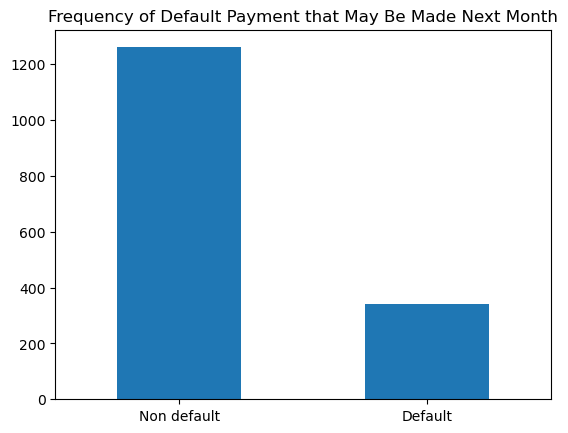

In [9]:
#plot a barplot to show comparison of target variable frequency
ax1 = credit_ds["Default payment next month"].value_counts().plot(
    kind='bar', title="Frequency of Default Payment that May Be Made Next Month", rot=0
)

<b>Observations:</b><br>
    - Barplot further proves that the target variable is unbalanced

# 1.2) Data Visualisation
-  Part of Data Exploration

### <u>Numerical Variables (Distribution)</u>

- Check against the customers' default payment for the next month

#### Credit Limit

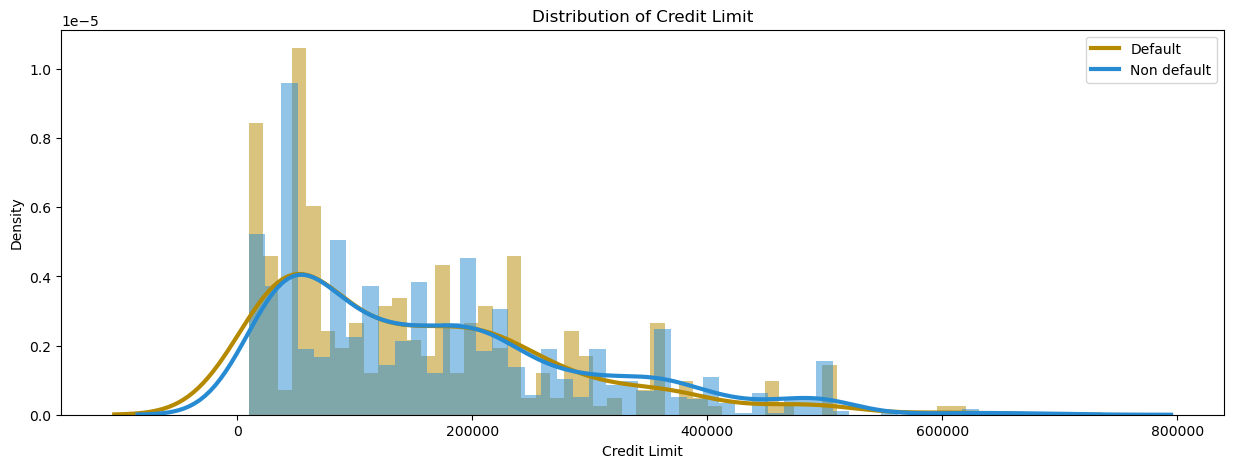

In [10]:
#Credit Limit Distribution
plt.figure(figsize=(15,5))
plt.hist(
    credit_df[credit_df["Default payment next month"] == 1]["Credit Limit"],
    density = True,
    bins = 50,
    color = '#b5890080'
)
plt.hist(
    credit_df[credit_df["Default payment next month"] == 0]["Credit Limit"],
    density = True,
    bins = 50,
    color='#268bd280'
)
sns.kdeplot(credit_df[credit_df["Default payment next month"] == 1]["Credit Limit"], lw=3, color='#b58900')
sns.kdeplot(credit_df[credit_df["Default payment next month"] == 0]["Credit Limit"], lw=3, color='#268bd2')
plt.legend(np.unique(credit_ds["Default payment next month"]), loc="upper right")
plt.title("Distribution of Credit Limit")
plt.show()

<b>Observations:</b><br>
    - Distribution is skewed to the left, more customers with low credit limit than high credit limit <br>
    - Not much difference between data wiith customers that will default and not default payment next month

#### Age

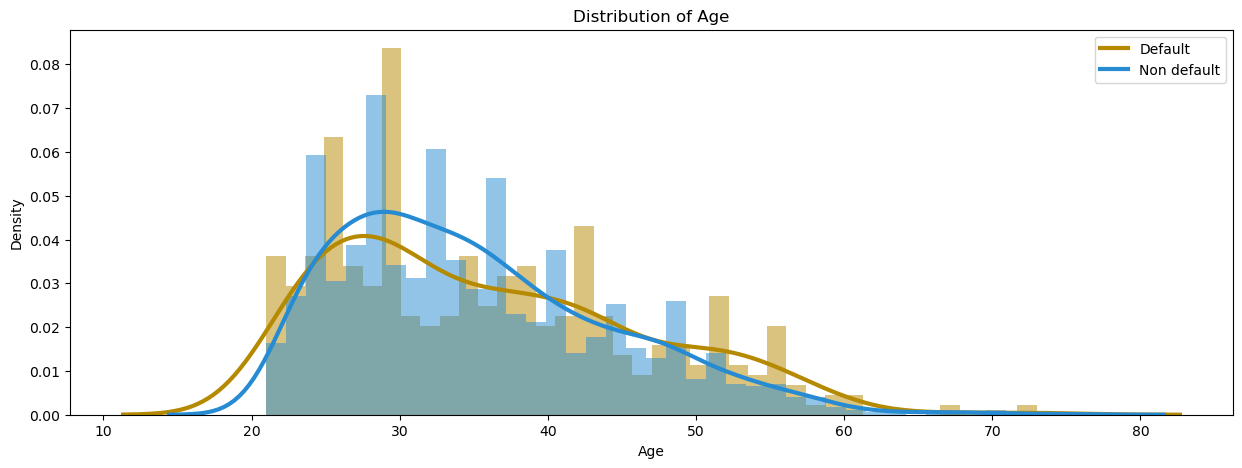

In [11]:
#Age Distribution
plt.figure(figsize=(15,5))
plt.hist(
    credit_df[credit_df["Default payment next month"] == 1]["Age"],
    density = True,
    bins = 40,
    color = '#b5890080'
)
plt.hist(
    credit_df[credit_df["Default payment next month"] == 0]["Age"],
    density = True,
    bins = 40,
    color='#268bd280'
)
sns.kdeplot(credit_df[credit_df["Default payment next month"] == 1]["Age"], lw=3, color='#b58900')
sns.kdeplot(credit_df[credit_df["Default payment next month"] == 0]["Age"], lw=3, color='#268bd2')
plt.legend(np.unique(credit_ds["Default payment next month"]), loc="upper right")
plt.title("Distribution of Age")
plt.show()

<b>Observations:</b><br>
    - Distribution is skewed to the left <br>
    - For both customers who default and don't default payment, age of customers peaked at a range from 27-30 years old

#### Bill_Amount & Pay_Amount Distribution

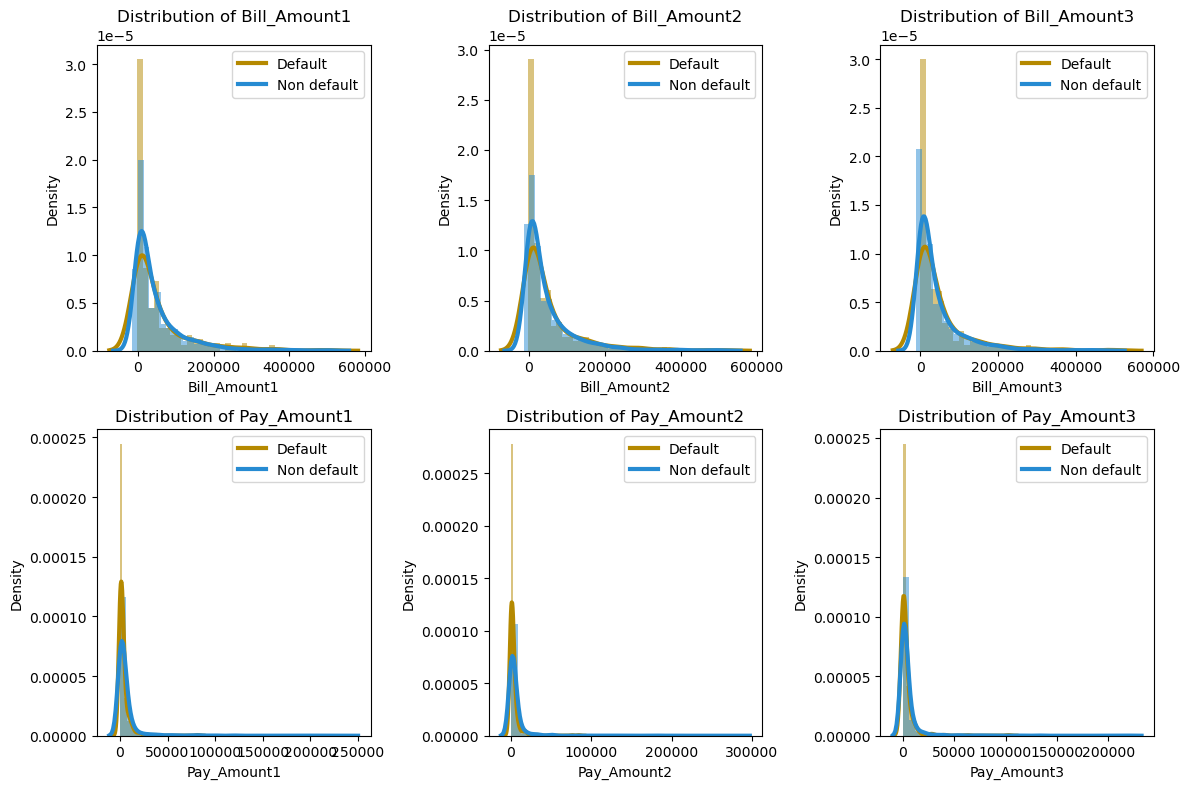

In [12]:
#Bill_Amount & Pay_Amount Distribution
columns=["Bill_Amount1","Bill_Amount2","Bill_Amount3","Pay_Amount1","Pay_Amount2","Pay_Amount3"]
fig, axs = plt.subplots(2,3, figsize=(12, 8))
axs=axs.flatten()

for i, col in enumerate(columns):
    ax=axs[i]
    ax.hist(
    credit_df[credit_df["Default payment next month"] == 1][col],
    density = True,
    bins = 35,
    color = '#b5890080'
    
    )
    ax.hist(
        credit_df[credit_df["Default payment next month"] == 0][col],
        density = True,
        bins = 35,
        color='#268bd280'
    )
    sns.kdeplot(credit_df[credit_df["Default payment next month"] == 1][col], lw=3, color='#b58900', ax=ax)
    sns.kdeplot(credit_df[credit_df["Default payment next month"] == 0][col], lw=3, color='#268bd2', ax=ax)
    ax.legend(np.unique(credit_ds["Default payment next month"]), loc="upper right")
    ax.set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - Distribution is very skewed to the left <br>
    - Larger amount of customers with below 100000 dollars as bill amount <br>
    - Larger amount of customers paid amounts below 50000 dollars <br>
    - No obvious pattern to determine distribution

#### Bill_Amount

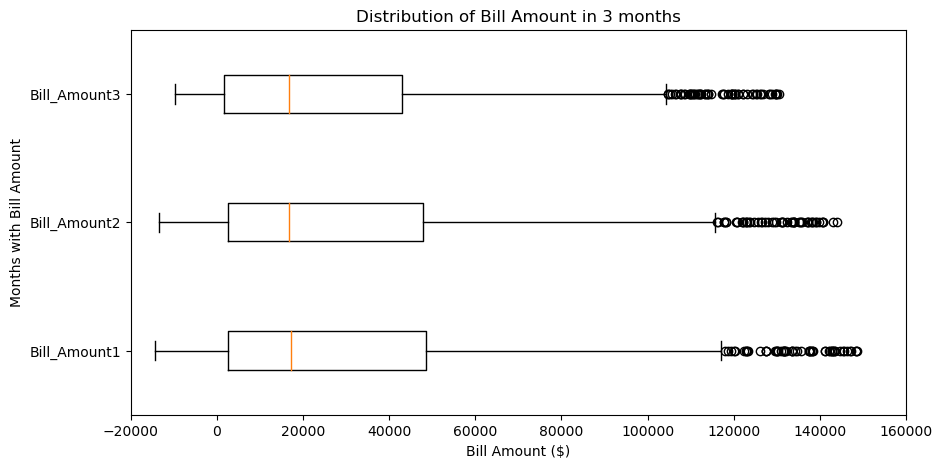

In [13]:
columns=["Bill_Amount1","Bill_Amount2","Bill_Amount3"]
boxplots=[]

fig, ax = plt.subplots(figsize=(10,5))

#Remove extreme outliers
for col in columns:
    numerical_col = credit_ds[col]
    Q1 = numerical_col.quantile(0.25)
    Q3 = numerical_col.quantile(0.75)
    IQR = Q3 - Q1
    filtered_values=numerical_col[(numerical_col >= Q1 -1.5*IQR) & (numerical_col <= Q3 + 1.5 * IQR)]
    boxplots.append(filtered_values.values)

plt.xlim(-20000,160000)
ax.boxplot(boxplots, vert=False, labels=columns)
plt.xlabel("Bill Amount ($)")
plt.ylabel("Months with Bill Amount")
plt.title("Distribution of Bill Amount in 3 months")
plt.show()

<b>Observations:</b><br>
    - Distribution is extremely skewed to the left <br>
    - Median of bill amounts in 3 months are the same which shows that the bills are equal in amount<br>
    - IQR of Bill_Amount3 is slightly smaller than the others while IQR of Bill_Amount1 and Bill_Amount2 which shows that the bill amount in the 3rd month is less spread out than the 1st and 2nd month<br>

#### Pay_Amount

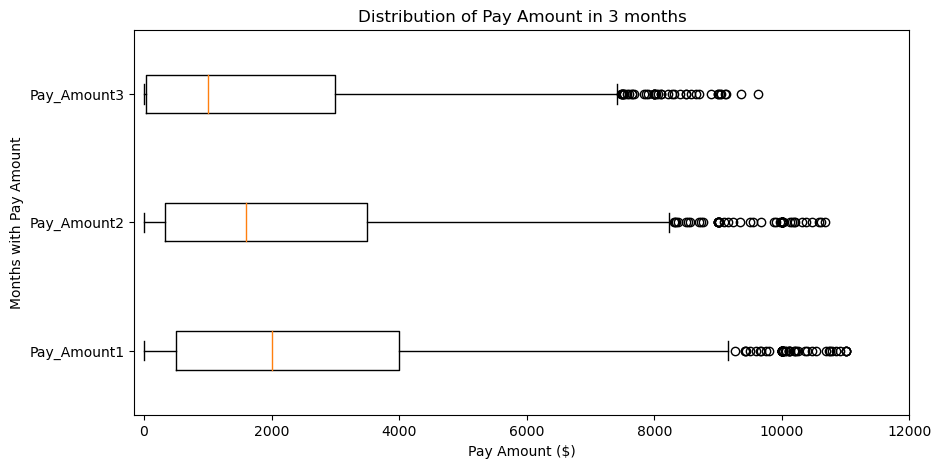

In [14]:
columns=["Pay_Amount1","Pay_Amount2","Pay_Amount3"]
boxplots=[]

fig, ax = plt.subplots(figsize=(10,5))

#Remove extreme outliers
for col in columns:
    numerical_col = credit_ds[col]
    Q1 = numerical_col.quantile(0.25)
    Q3 = numerical_col.quantile(0.75)
    IQR = Q3 - Q1
    filtered_values=numerical_col[(numerical_col >= Q1 -1.5*IQR) & (numerical_col <= Q3 + 1.5 * IQR)]
    boxplots.append(filtered_values.values)

ax.boxplot(boxplots, vert=False, labels=columns)
plt.xlim(-150,12000)
plt.xlabel("Pay Amount ($)")
plt.ylabel("Months with Pay Amount")
plt.title("Distribution of Pay Amount in 3 months")
plt.show()

<b>Observations:</b><br>
    - Distribution is extremely skewed to the left <br>
    - Median of pay amount decreases in each month which shows that the amount paid is getting lesser in each month<br>
    - IQR of pay amount decreases within every month which shows that the total amount paid is getting more consistent in each month<br>

### <u>Numerical Variables (Relationship)</u>

C:\Users\bryan\AppData\Local\Temp\ipykernel_29324\3865247049.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_df.corr(), annot=True)


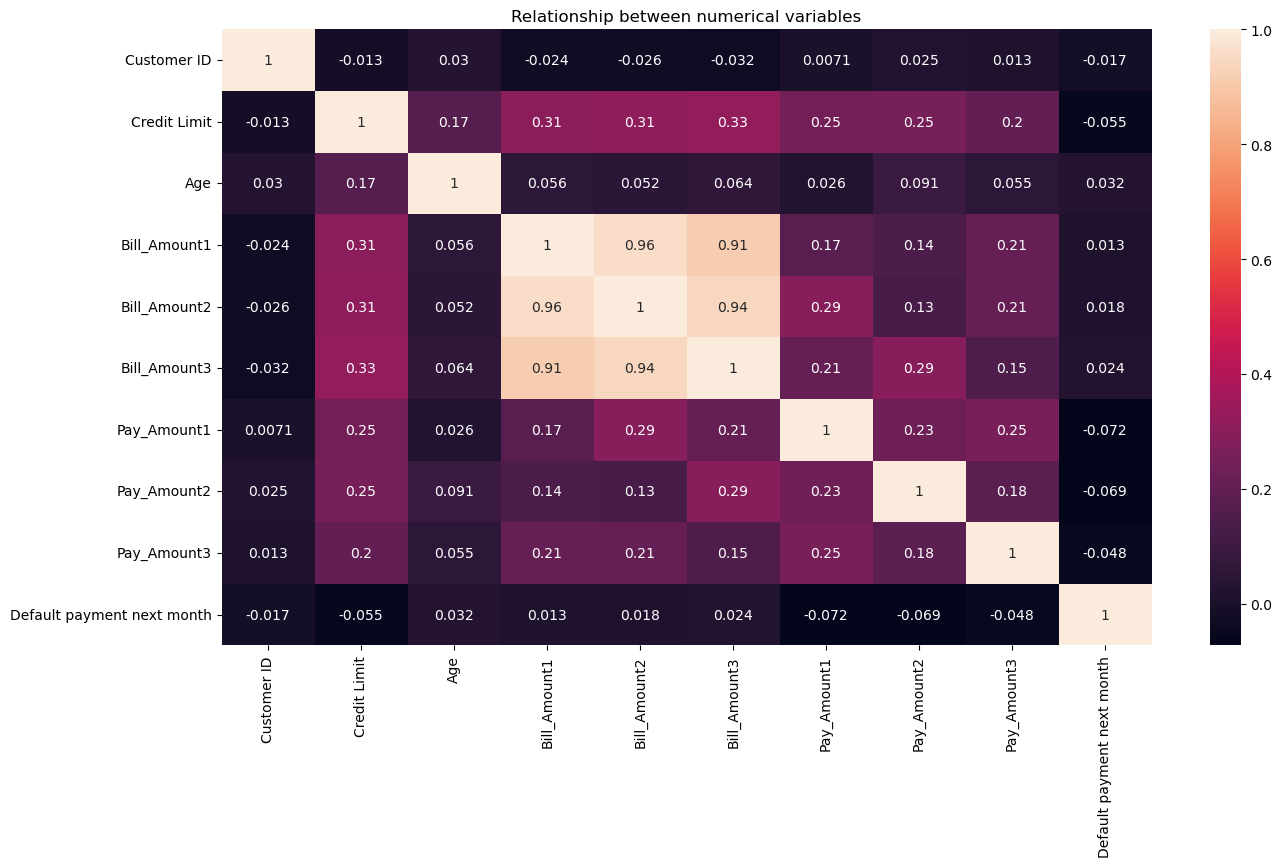

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(credit_df.corr(), annot=True)
plt.title("Relationship between numerical variables")
plt.show()

<b>Observations:</b><br>
    - The 3 Bill_Amounts have a very strong correlation with one another, might possibly mean they are the cumulative amount in each month <br>
    - Bill Amount & Pay Amounty
    - Rest of the variables have weak relationship with one another<br>

### <u>Categorical Variables (Proportion)</u>

#### Gender, Marriage Status & Education

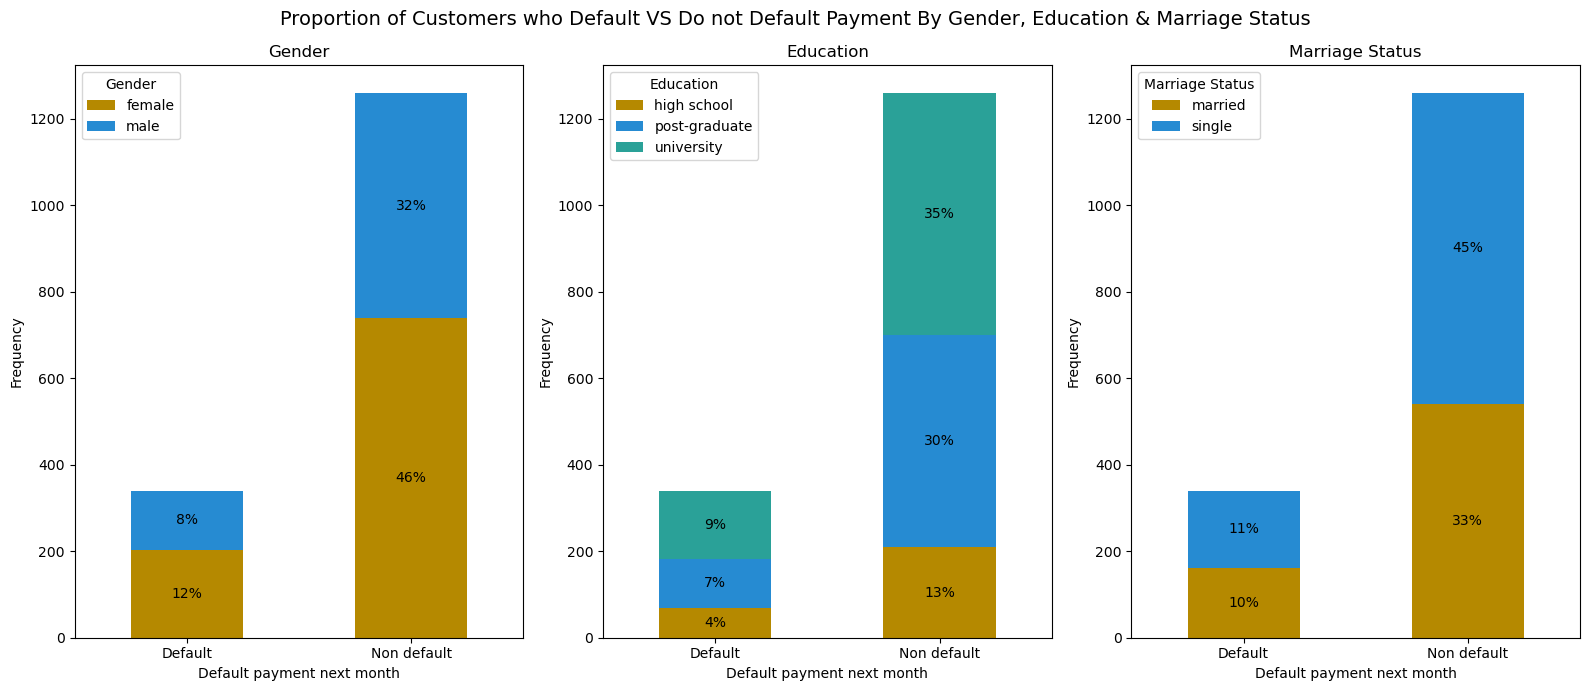

In [16]:
#Re-extract unique values from Default payment next month column
unique_payment = np.unique(credit_ds['Default payment next month'])

#Group data by default payment status
grouped= credit_ds.groupby(['Default payment next month'])

#Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

#Calculate total count of customers who default and do not default payment
total_count = credit_ds["Default payment next month"].value_counts()

#1st subplot: Proportion of customers genders who default payment VS do not default
gender_count=grouped["Gender"].value_counts().unstack()
gender_count.plot(kind='bar', stacked=True, ax=axes[0], rot=0, color=['#b58900','#268bd2'])
axes[0].set_title('Gender')
axes[0].set_xlabel('Default payment next month')
axes[0].set_ylabel('Frequency')

#Add percentage labels
for p in axes[0].patches:
    width, height = p.get_width(), p.get_height()
    x, y=p.get_xy()
    axes[0].annotate(f'{int(height/total_count.sum() * 100)}%',
                     (x+width/2, y+height/2), ha='center', va='center')

#2nd subplot: Proportion of customers education who default VS do not default payment
education_count=grouped["Education"].value_counts().unstack()
education_count.plot(kind='bar', stacked=True, ax=axes[1], rot=0, color=['#b58900','#268bd2','#2aa198'])
axes[1].set_title('Education')
axes[1].set_xlabel('Default payment next month')
axes[1].set_ylabel('Frequency')

#Add percentage labels
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y=p.get_xy()
    axes[1].annotate(f'{int(height/total_count.sum() * 100)}%',
                     (x+width/2, y+height/2), ha='center', va='center')

#3rd subplot: Proportion of customers marriage status who default VS do not default payment
marriage_count=grouped["Marriage Status"].value_counts().unstack()
marriage_count.plot(kind="bar", stacked=True, ax=axes[2], rot=0, color=['#b58900','#268bd2'])
axes[2].set_title('Marriage Status')
axes[2].set_xlabel('Default payment next month')
axes[2].set_ylabel('Frequency')

#Add percentage labels
for p in axes[2].patches:
    width, height = p.get_width(), p.get_height()
    x, y=p.get_xy()
    axes[2].annotate(f'{int(height/total_count.sum() * 100)}%',
                     (x+width/2, y+height/2), ha='center', va='center')

fig.suptitle("Proportion of Customers who Default VS Do not Default Payment By Gender, Education & Marriage Status", fontsize=14)
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
    - For each category, the proportion of customers who do not default payment are much greater than those who default payment<br>
    - For Gender, proportion of female customers is much larger than the male customers for both default and non default payment<br>
    - For Education, proportion of customers in university is largest, followed by post-graduate then high school for both default and non-default payment<br>
    - For Marriage Status, proportion of single customers is larger than married customers for both default and non default payment<br>

# 2) Data Cleaning/Feature Engineering

In [17]:
#Change spelling error in data to university
credit_df["Education"] = credit_df["Education"].replace("univeresity", "university")
print(credit_df["Education"].unique())

['university' 'post-graduate' 'high school']


### <u>Drop Unwanted Columns</u>
- Drop Customer ID as it is unique for every row

In [18]:
credit_df.drop("Customer ID", axis=1, inplace=True)
display(credit_df.head())

Credit Limit  Gender   Education Marriage Status  Age  Bill_Amount1  \
0         20000  female  university         married   24          3913   
1        120000  female  university          single   26          2682   
2         90000  female  university          single   34         29239   
3         50000  female  university         married   37         46990   
4         50000    male  university         married   57          8617   

   Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  \
0          3102           689            0          689            0   
1          1725          2682            0         1000         1000   
2         14027         13559         1518         1500         1000   
3         48233         49291         2000         2019         1200   
4          5670         35835         2000        36681        10000   

   Default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

### <u>Separate Features & Target labels</u>

In [19]:
X, y = credit_df.drop("Default payment next month", axis=1), credit_df["Default payment next month"]

### <u>Split Testing & Training data</u>
- Split data 80/20 training/testing data to train and test the model
- Stratify parameter will maintain the distribution of sample values 

In [20]:
#Split test and training data for features and target label
#random_state sets a seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)

X_trainSubset = X_train.copy()

(1280, 11)
(320, 11)


### <u>Categorical Encoding</u>
- Needs to encode categorical data as numerical data so that the data can be processed by the model

#### One-Hot Encoding
- Used for Gender & Marital Status columns
- Meant for nominal data

In [21]:
#Encode for Gender
enc1 = OneHotEncoder(sparse_output=False, categories="auto")
gender_ds = enc1.fit_transform(X_trainSubset[["Gender"]].values.reshape(-1,1))
gender_ds = pd.DataFrame(gender_ds, columns=["male", "female"]).drop("female",axis=1)
X_trainSubset[["Gender"]]=gender_ds.values

#Encode for Marriage Status
marriage_ds = enc1.fit_transform(X_trainSubset[["Marriage Status"]].values.reshape(-1,1))
X_trainSubset[["Marriage Status"]] = pd.DataFrame(marriage_ds, columns=["married", "single"]).drop("married",axis=1).values

#### Ordinal Encoding
- Used for education column
- Meant for ordinal data

In [22]:
#Encode for Education
enc2 = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, categories=[["post-graduate", "university", "high school"]])
X_trainSubset[["Education"]] = enc2.fit_transform(X_trainSubset[["Education"]])
display(X_trainSubset)

Credit Limit  Gender  Education  Marriage Status  Age  Bill_Amount1  \
924          30000     1.0        1.0              1.0   24         27391   
423         200000     0.0        1.0              0.0   38        104978   
611         360000     1.0        0.0              1.0   29          3280   
960         380000     0.0        0.0              1.0   43          8201   
985         130000     0.0        2.0              1.0   43          1018   
...            ...     ...        ...              ...  ...           ...   
1246        170000     0.0        0.0              0.0   39         74298   
11          260000     1.0        0.0              1.0   51         12261   
981          30000     0.0        1.0              1.0   29         34423   
414         480000     1.0        2.0              0.0   41         14867   
1054        230000     0.0        1.0              0.0   53          1350   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  
924          28412         28575         1767         1700         1010  
423         105924        102663         4500            0         3500  
611              0             0            0            0            0  
960           7882            -2           39            0            0  
985           6377            -2         6433            2          937  
...            ...           ...          ...          ...          ...  
1246         80073         81959         7000         3800        10000  
11           21670          9966        21818         9966         8583  
981          33952         33165            0            0            0  
414          26665        199960        26734       199982         9033  
1054             0             0            0            0            0  

[1280 rows x 11 columns]

### <u>Handling Imbalanced Data</u>

Mentioned before in the Data Exploration portion, the target data is imbalanced and we shall use y_train data to visualise this distribution again
##### <b><u>BEFORE</u></b>

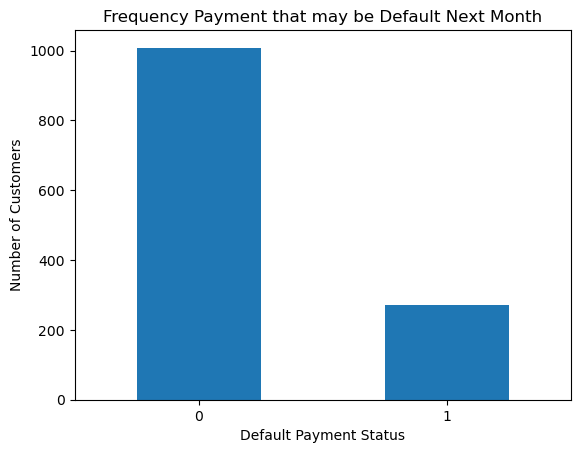

In [23]:
#plot a barplot to show comparison of target variable frequency
ax1 = y_train.value_counts().plot(
    kind='bar', 
    title="Frequency Payment that may be Default Next Month", 
    rot=0,
    xlabel='Default Payment Status',
    ylabel='Number of Customers'
)

- For me, using the Random Resampling technique from IMBLEARN will allow each customer to have an equal chance of being picked, solving the issue of imbalanced data

In [24]:
x_train_resampled, y_train_resampled = RandomOverSampler(random_state=15).fit_resample(X_trainSubset, y_train)
x_train_resampled

Credit Limit  Gender  Education  Marriage Status  Age  Bill_Amount1  \
0            30000     1.0        1.0              1.0   24         27391   
1           200000     0.0        1.0              0.0   38        104978   
2           360000     1.0        0.0              1.0   29          3280   
3           380000     0.0        0.0              1.0   43          8201   
4           130000     0.0        2.0              1.0   43          1018   
...            ...     ...        ...              ...  ...           ...   
2011        160000     1.0        0.0              1.0   29        160432   
2012         20000     1.0        1.0              0.0   35         18648   
2013        500000     1.0        2.0              0.0   28         22848   
2014         50000     1.0        0.0              1.0   24         36166   
2015        230000     0.0        1.0              1.0   32        189567   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  
0            28412         28575         1767         1700         1010  
1           105924        102663         4500            0         3500  
2                0             0            0            0            0  
3             7882            -2           39            0            0  
4             6377            -2         6433            2          937  
...            ...           ...          ...          ...          ...  
2011        163916        159676         7500            0        11558  
2012         18061         21034            0         3292            0  
2013         23638         18878         1516         1300         1000  
2014         37188         37680         1900         1400         1700  
2015        189023        187521         9000         6300         6200  

[2016 rows x 11 columns]

##### <b><u>AFTER</u></b>

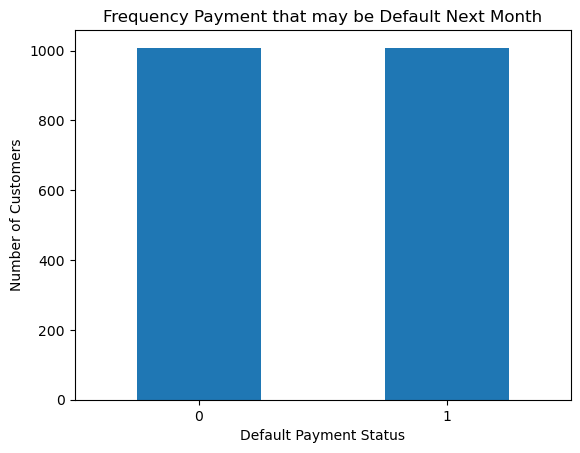

In [25]:
#plot a barplot to show comparison of target variable frequency
ax1 = y_train_resampled.value_counts().plot(
    kind='bar', 
    title="Frequency Payment that may be Default Next Month", 
    rot=0,
    xlabel='Default Payment Status',
    ylabel='Number of Customers'
)

### <u>Standardization</u>
- Using StandardScaler to standardise the scale of the data so that the mean=0 and standard deviation=1 makes data consistent for model to use

In [26]:
num_cols = ['Credit Limit', 'Age', 'Bill_Amount1', 'Bill_Amount2', 
            'Bill_Amount3', 'Pay_Amount1','Pay_Amount2', 'Pay_Amount3']
X_train_scaled = x_train_resampled.copy()
X_train_scaled[num_cols]=StandardScaler().fit_transform(X_train_scaled[num_cols])
X_train_scaled

Credit Limit  Gender  Education  Marriage Status       Age  \
0        -1.046811     1.0        1.0              1.0 -1.195065   
1         0.283123     0.0        1.0              0.0  0.290882   
2         1.534826     1.0        0.0              1.0 -0.664370   
3         1.691289     0.0        0.0              1.0  0.821578   
4        -0.264497     0.0        2.0              1.0  0.821578   
...            ...     ...        ...              ...       ...   
2011     -0.029802     1.0        0.0              1.0 -0.664370   
2012     -1.125042     1.0        1.0              0.0 -0.027535   
2013      2.630066     1.0        2.0              0.0 -0.770509   
2014     -0.890348     1.0        0.0              1.0 -1.195065   
2015      0.517817     0.0        1.0              1.0 -0.345952   

      Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  \
0        -0.306306     -0.279912     -0.251533    -0.261294    -0.211703   
1         0.692674      0.739735      0.769747    -0.016591    -0.334166   
2        -0.616750     -0.653663     -0.645430    -0.419505    -0.334166   
3        -0.553389     -0.549978     -0.645458    -0.416013    -0.334166   
4        -0.645875     -0.569776     -0.645458     0.156483    -0.334022   
...            ...           ...           ...          ...          ...   
2011      1.406678      1.502602      1.555653     0.252018    -0.334166   
2012     -0.418878     -0.416076     -0.355483    -0.419505    -0.097019   
2013     -0.364800     -0.342712     -0.385203    -0.283767    -0.240518   
2014     -0.193323     -0.164466     -0.126023    -0.249385    -0.233314   
2015      1.781808      1.832877      1.939488     0.386323     0.119669   

      Pay_Amount3  
0       -0.273233  
1       -0.058382  
2       -0.360381  
3       -0.360381  
4       -0.279532  
...           ...  
2011     0.636909  
2012    -0.360381  
2013    -0.274096  
2014    -0.213696  
2015     0.174590  

[2016 rows x 11 columns]

# Failed Attempts (Feature Engineering)
- Some good formulas and good feature engineering that were thought of but they did not improve the scores

### <u>Attempted Formulas</u>
- Tried out multiple formulas but it failed to work

#### Average Bill/Pay
- Average Bill/Pay in each month

In [27]:
#df['Average_Bill']=(df['Bill_Amount1']+df['Bill_Amount2']+df['Bill_Amount3'])/3
#df['Average_Pay']=(df['Pay_Amount1']+df['Pay_Amount2']+df['Pay_Amount3'])/3

#### Credit Utilization Ratio
- Different combinations of bill per credit limit

In [28]:
#df['Credit_utilization1']=df['Bill_Amount1']/df['Credit Limit']
#df['Credit_utilization2']=df['Bill_Amount2']/df['Credit Limit']
#df['Credit_utilization3']=df['Bill_Amount3']/df['Credit Limit']
#df['Credit_Utilization_Ratio']=(df['Bill_Amount1'] + df['Bill_Amount2'] + df['Bill_Amount3'])/df['Credit Limit']

### <u>Discretization</u>
- Bin the age into 3 bins
- Did not improve the scores so it was not used in the pipeline

##### <b><u>BEFORE</u></b>

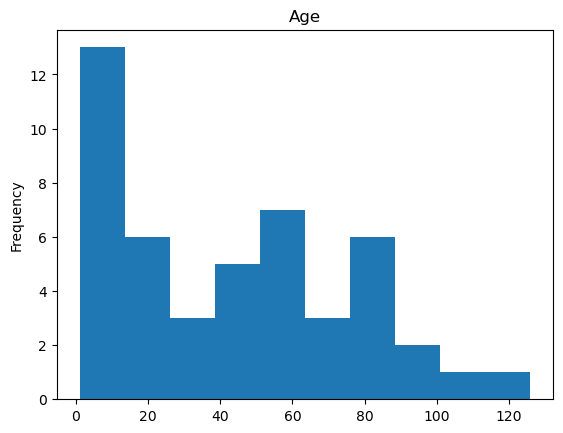

In [29]:
#plot a barplot to show comparison of target variable frequency
ax1 = X_train_scaled["Age"].value_counts().plot(
    kind='hist', 
    title="Age", 
    rot=0
)

In [30]:
binsdiscretize = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
bins_discretized = binsdiscretize.fit_transform(X_train_scaled[["Age"]])
print(bins_discretized)
bins_discretized = pd.Series(bins_discretized.flatten(), name="Age", dtype="category")

idx=X_train_scaled.columns.get_loc('Age') + 1
df_col = pd.concat((X_train_scaled.iloc[:,:idx-1], bins_discretized, X_train_scaled.iloc[:,idx:]), axis=1)
display(df_col)
display(df_col["Age"].value_counts())

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


Credit Limit  Gender  Education  Marriage Status  Age  Bill_Amount1  \
0        -1.046811     1.0        1.0              1.0  0.0     -0.306306   
1         0.283123     0.0        1.0              0.0  0.0      0.692674   
2         1.534826     1.0        0.0              1.0  0.0     -0.616750   
3         1.691289     0.0        0.0              1.0  1.0     -0.553389   
4        -0.264497     0.0        2.0              1.0  1.0     -0.645875   
...            ...     ...        ...              ...  ...           ...   
2011     -0.029802     1.0        0.0              1.0  0.0      1.406678   
2012     -1.125042     1.0        1.0              0.0  0.0     -0.418878   
2013      2.630066     1.0        2.0              0.0  0.0     -0.364800   
2014     -0.890348     1.0        0.0              1.0  0.0     -0.193323   
2015      0.517817     0.0        1.0              1.0  0.0      1.781808   

      Bill_Amount2  Bill_Amount3  Pay_Amount1  Pay_Amount2  Pay_Amount3  
0        -0.279912     -0.251533    -0.261294    -0.211703    -0.273233  
1         0.739735      0.769747    -0.016591    -0.334166    -0.058382  
2        -0.653663     -0.645430    -0.419505    -0.334166    -0.360381  
3        -0.549978     -0.645458    -0.416013    -0.334166    -0.360381  
4        -0.569776     -0.645458     0.156483    -0.334022    -0.279532  
...            ...           ...          ...          ...          ...  
2011      1.502602      1.555653     0.252018    -0.334166     0.636909  
2012     -0.416076     -0.355483    -0.419505    -0.097019    -0.360381  
2013     -0.342712     -0.385203    -0.283767    -0.240518    -0.274096  
2014     -0.164466     -0.126023    -0.249385    -0.233314    -0.213696  
2015      1.832877      1.939488     0.386323     0.119669     0.174590  

[2016 rows x 11 columns]

0.0    1341
1.0     626
2.0      49
Name: Age, dtype: int64

##### <b><u>AFTER</u></b>

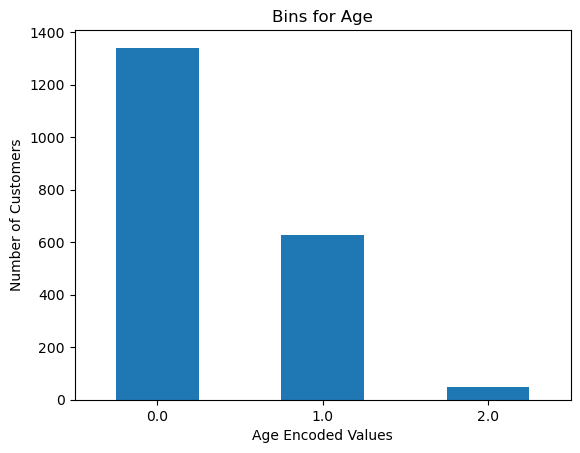

In [31]:
#plot a barplot to show comparison of target variable frequency
ax1 = df_col["Age"].value_counts().plot(
    kind='bar', 
    title="Bins for Age", 
    rot=0,
    xlabel='Age Encoded Values',
    ylabel='Number of Customers'
)

- Age was split into 3 bins but it did not improve the f2 score or balanced accuracy score so it was not included in the pipeline

# <u>Pipeline</u>
- To link the steps of data engineering and the model implementation together

In [32]:
#Categorical transformer
categoricalTransformer = ColumnTransformer([
        ("oneHotEncoding", OneHotEncoder(sparse_output=False, categories="auto"),['Gender','Marriage Status']),
        ("ordinalEncoding", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),['Education'])
    ],
    remainder="passthrough")

#Numerical transformer
num_cols = ['Credit Limit', 'Age', 'Bill_Amount1', 'Bill_Amount2', 
            'Bill_Amount3', 'Pay_Amount1','Pay_Amount2', 'Pay_Amount3']

numericalTransformer = ColumnTransformer([
    ("standardise", StandardScaler(), num_cols)
],
remainder="passthrough")

#Combining two transformers into preprocessor
preprocessor=ColumnTransformer([
    ("categorical", categoricalTransformer, ["Gender", "Marriage Status", "Education"]),
    ("numerical", numericalTransformer, num_cols)
],
remainder="passthrough")

#OverSampling transformer
overSamplingTransformer = RandomOverSampler(random_state=42)

#Building the steps
steps = [
    ("preprocessing", preprocessor),
    ("oversampling", overSamplingTransformer),
    ("model")
]

model_step=len(steps)-1

# 3) Model Selection

### <u>Dummy Baseline Model</u>
Using DummyClassifier as a benchmark to compare other models with

In [33]:
#Add in DummyClassifier class
steps[model_step]=('model', DummyClassifier(strategy="uniform"))

dummy=Pipeline(steps=steps)
dummy.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('oneHotEncoding',
                                                                                   OneHotEncoder(sparse_output=False),
                                                                                   ['Gender',
                                                                                    'Marriage '
                                                                                    'Status']),
                                                                                  ('ordinalEncoding',
                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                  unknown_value=-1),
                                                                                   ['Education'])]),
                                                  ['...
                                                                    transformers=[('standardise',
                                                                                   StandardScaler(),
                                                                                   ['Credit '
                                                                                    'Limit',
                                                                                    'Age',
                                                                                    'Bill_Amount1',
                                                                                    'Bill_Amount2',
                                                                                    'Bill_Amount3',
                                                                                    'Pay_Amount1',
                                                                                    'Pay_Amount2',
                                                                                    'Pay_Amount3'])]),
                                                  ['Credit Limit', 'Age',
                                                   'Bill_Amount1',
                                                   'Bill_Amount2',
                                                   'Bill_Amount3',
                                                   'Pay_Amount1', 'Pay_Amount2',
                                                   'Pay_Amount3'])])),
                ('oversampling', RandomOverSampler(random_state=42)),
                ('model', DummyClassifier(strategy='uniform'))])

### <u>Model Selection</u>
Here are some reasons and benefits of why I have selected these models for classification.

<b><u>Logistic Regression</u></b><br>
- Measures the probability of whether the customer default payment using a sigmoid function <br>
- Predicted y-value lies below threshold y=0 and lie above threshold y=1 to show whether payment is default or not <br>
- Easy model to implement <br>
    
<b><u>Naive Bayes</u></b><br>
- Treat each feature independently and uses Bayes Theorem to find out how the target variable is classified <br>
    
<b><u>KNN</u></b><br>
- Uses the value of the nearest data points to find the closest data points in training set<br>
- Forecast the label of the test data based on the labels of the closest neighbours in training set<br>
    
<b><u>SVM</u></b><br>
- Finds the boundary that separates the classes as wide a margin as possible<br>
- Uses that hyperplane to separate the classes of the test data set <br>
- Easy model to implement<br>
    
<b><u>Decision Tree</u></b><br>
- Predict the customers who default and do not default payment by subsetting data into smaller groups based on different attributes (ex. gender, age, marital_status) <br>

<b><u>Random Forest</u></b><br>
- Build multiple decision trees on different subsets of input features and training data and aggregate predictions of individual trees to make a final prediction <br>
- Reduces risk of overfitting <br>
- Robust to noisy data, irrelevant features <br>
    
<b><u>Gradient Boosting</u></b><br>
- Ensemble model that combines several weak models to create a strong model (Prediction based on aggregation of all predictions of all trees in the sequence) <br>

In [34]:
#Defining the models used with default hyperparameters
models = [('Logistic Regression', LogisticRegression(random_state=42)),
          ('Naive Bayes', GaussianNB()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(random_state=42)),
          ('Decision Tree', DecisionTreeClassifier(random_state=42)),
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
        ]

# 4) Model Evaluation
Before I reveal the evaluation metrics I have used, I will show you the possible classification the model can classify the samples in

<b><u>True Positive (TP)</u><b><br>
- Customer default payment in the next month and prediction is positive <br>
    
<b><u>True Negative (TN)</u><b><br>
- Customer does not default payment in the next month and prediction is negative <br>

<b><u>False Positive (FP)</u><b><br>
- Customer does not default payment in the next month but prediction is positive <br>

<b><u>False Negative (FN)</u><b><br>
- Customer default payment in the next month but prediction is negative <br>

##### As such, the evaluation metrics below are the ones that I have chosen to evaluate my models<br>
- Prioritise F2 score & Balanced Accuracy

<b><u>F2 Score</u><b><br>
- Variation of F1 Score <br>
- Weighted harmonic mean of the precision and recall <br>
- Gives more weight to recall instead of precision <br>
- Beta determines the weight of recall<br>
    - Higher Beta gives more weight to recall
    
    $$ F2 = \frac{{(1 + \beta^2) \cdot (precision \cdot recall)}}{{(\beta^2 \cdot precision) + recall}} $$

<b><u>Balanced Accuracy</u><b><br>
- Suits the imbalanced testing data <br>
    
   $$ Sensitivity = Recall = \frac{TP}{TP+FN} $$
    
   $$ Specificity = \frac{TN}{FP+TN} $$
    
   $$ BalancedAcc = \frac{Sensitivity+Specificity}{2} $$
    
<b><u>ROC_AUC</u><b><br>
- Area under the ROC helps us observe proportion of the classification<br>

##### Terms below can also help with understanding the formulas on top
<b><u>Accuracy</u><b><br>
- Shows the percentage of correct predictions model can make <br>
    
   $$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$
    
<b><u>Recall</u><b><br>
- Shows the percentage of predicted positives out of the total number of postives labels<br>
- High Recall Score shows:
    - Low False Negative rate
    - Predicted most customers who will default payment next month correctly
    
   $$ Recall = \frac{TP}{TP+FN} $$

<b><u>Precision</u><b><br>
- Shows the percentage of predicted positives that was actually correct<br>
- High Precision Score shows:
    - Low False Positive rate
    
   $$ Precision = \frac{TP}{TP+FP} $$    

<b><u>F1 Score</u><b><br>
- Harmonic mean between precision and recall <br>
- Metrics does not consider how many True Negatives are classified <br>
    
   $$ F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN} $$

In [35]:
#Use make_scorer to make own score, beta is given as value 2

#Store scoring metrics
f2 = make_scorer(fbeta_score, beta =2)
score_metrics={
    'f2': f2,
    'balanced_accuracy':'balanced_accuracy',
    'roc_auc':'roc_auc'
}

### <u>Dummy Baseline Model</u>
- Evaluation metrics of dummy baseline

In [36]:
print(f'Benchmark Accuracy Score : {dummy.score(X_test, y_test)}')
scores = cross_validate(dummy, X_train, y_train, cv=10, scoring=score_metrics, return_train_score=True)

#Retrieve the mean score of the Dummy Baseline Model
scores_df = pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean Score"))
display(scores_df)

Benchmark Accuracy Score : 0.55


C:\Users\bryan\AppData\Local\Temp\ipykernel_29324\3650790252.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean Score"))


fit_time  score_time   test_f2  train_f2  test_balanced_accuracy  \
0           0.010123    0.012518  0.418994  0.414033                0.500550   
1           0.010135    0.013704  0.371429  0.423620                0.473414   
2           0.010651    0.011558  0.520231  0.370852                0.600660   
3           0.009531    0.013443  0.338983  0.359456                0.440044   
4           0.010548    0.013509  0.517241  0.361947                0.595710   
5           0.010542    0.013315  0.449438  0.391586                0.528970   
6           0.010243    0.012106  0.393258  0.372751                0.482032   
7           0.008518    0.006959  0.523256  0.392857                0.605611   
8           0.010403    0.012614  0.454545  0.403121                0.545714   
9           0.010028    0.012177  0.367232  0.379665                0.472143   
Mean Score  0.010072    0.012190  0.435461  0.386989                0.524485   

            train_balanced_accuracy  test_roc_auc  train_roc_auc  
0                          0.507700           0.5            0.5  
1                          0.523522           0.5            0.5  
2                          0.488441           0.5            0.5  
3                          0.476806           0.5            0.5  
4                          0.472619           0.5            0.5  
5                          0.502176           0.5            0.5  
6                          0.483151           0.5            0.5  
7                          0.504932           0.5            0.5  
8                          0.512909           0.5            0.5  
9                          0.488499           0.5            0.5  
Mean Score                 0.496076           0.5            0.5

<b>Observations:</b><br>
   -  ROC_AUC score is 0.5 which shows that the model is randomly selecting and predicting the data points

### <u>Models Selection</u>
- Evaluation metrics of several models to try out to see which model gets the best score based on the score metrics
- Based on their default parameters
- Typically looking at f2 score and balanced accuracy score

In [37]:
#Function for the model
def evaluate_Model(X_train, y_train, models, scoring):
    avgModelScores=[]
    #Iterate through the models
    for name, model in models:
        steps[model_step]=('model', model)
        score=cross_validate(
            Pipeline(steps=steps),
            X_train,
            y_train,
            scoring=scoring,
            cv=10,
            return_train_score=True
        )
        avgModelScores.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(avgModelScores).sort_values(by=[
        "test_f2", 
        "test_balanced_accuracy"
    ],ascending=False)

model_Scores=evaluate_Model(X_train, y_train, models, score_metrics)


In [38]:
model_Scores

fit_time  score_time   test_f2  train_f2  \
Naive Bayes          0.011167    0.012796  0.575768  0.575950   
Logistic Regression  0.031858    0.013346  0.474965  0.525326   
SVM                  0.169309    0.050013  0.436353  0.599533   
Gradient Boosting    0.432679    0.015439  0.352269  0.776381   
KNN                  0.014307    0.024108  0.343388  0.737393   
Decision Tree        0.020452    0.015384  0.266191  1.000000   
Random Forest        0.369181    0.033164  0.201443  1.000000   

                     test_balanced_accuracy  train_balanced_accuracy  \
Naive Bayes                        0.532803                 0.532232   
Logistic Regression                0.546983                 0.588878   
SVM                                0.524082                 0.654736   
Gradient Boosting                  0.565562                 0.842814   
KNN                                0.491907                 0.791417   
Decision Tree                      0.531878                 1.000000   
Random Forest                      0.551943                 1.000000   

                     test_roc_auc  train_roc_auc  
Naive Bayes              0.556845       0.583191  
Logistic Regression      0.583473       0.628375  
SVM                      0.551975       0.731221  
Gradient Boosting        0.617446       0.926425  
KNN                      0.497019       0.885393  
Decision Tree            0.531878       1.000000  
Random Forest            0.594055       1.000000

<b>Observations:</b><br>
   -  Best 3 models with the highest test_f2 scores include Naive Bayes, Logistic Regression & SVM
   -  Top model with highest test_balanced_accuracy include Gradient Boosting
   -  Trees based model like Decision Tree and Random Forest got 1 for every score metrics which implies:
       - Both Decision Tree and Random Forest have overfitted the training data and are unable to generalize the new, unseen data, hence have a low score for all the test data.

### <u>Initialize Best Scoring Models</u>
- Naive Bayes, Logisitic Regression & SVM has a much higher F2 score than the other models
- Gradient Boosting has the highest balanced accuracy score
- Look at the scores for each fold

In [39]:
# Logistic Regression Classifier
steps[model_step] = ("model", LogisticRegression(random_state=42))

logisticRegress_clf = Pipeline(steps=steps)
logisticRegress_clf.fit(X_train, y_train)
scores = cross_validate(
    logisticRegress_clf,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29324\403193481.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


fit_time  score_time   test_f2  test_balanced_accuracy  test_roc_auc
0     0.014524    0.009512  0.511364                0.585809      0.660433
1     0.018546    0.008523  0.292398                0.422809      0.437844
2     0.020033    0.008511  0.454545                0.507884      0.575724
3     0.017034    0.008510  0.573770                0.621562      0.618629
4     0.022038    0.009515  0.592784                0.614045      0.635497
5     0.017018    0.009021  0.449438                0.528970      0.553355
6     0.015521    0.007549  0.446927                0.524019      0.543454
7     0.015550    0.007513  0.469613                0.537587      0.608728
8     0.014550    0.007515  0.431034                0.532857      0.559643
9     0.015070    0.007514  0.527778                0.594286      0.641429
Mean  0.016988    0.008368  0.474965                0.546983      0.583473

In [40]:
# Naive Bayes
steps[model_step] = ("model", GaussianNB())

naivebayes_clf = Pipeline(steps=steps)
naivebayes_clf.fit(X_train, y_train)
scores = cross_validate(
    naivebayes_clf,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29324\2688731599.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


fit_time  score_time   test_f2  test_balanced_accuracy  test_roc_auc
0     0.008512    0.008530  0.600000                0.554455      0.579025
1     0.009511    0.008538  0.540541                0.498900      0.507151
2     0.009529    0.007509  0.547945                0.513751      0.531353
3     0.013533    0.011509  0.560538                0.517418      0.562523
4     0.008510    0.008530  0.580357                0.535937      0.582325
5     0.008511    0.008029  0.560748                0.538504      0.509351
6     0.008540    0.010586  0.580357                0.535937      0.565457
7     0.008586    0.008511  0.577778                0.530986      0.637697
8     0.012530    0.012513  0.584416                0.522143      0.545357
9     0.008509    0.007001  0.625000                0.580000      0.548214
Mean  0.009627    0.009125  0.575768                0.532803      0.556845

In [41]:
# Gradient Boosting Classifier
steps[model_step] = ("model", GradientBoostingClassifier(random_state=42))

gradientBoost_clf = Pipeline(steps=steps)
gradientBoost_clf.fit(X_train, y_train)
scores = cross_validate(
    gradientBoost_clf,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29324\1005335034.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


fit_time  score_time   test_f2  test_balanced_accuracy  test_roc_auc
0     0.273835    0.008523  0.410959                0.593509      0.634397
1     0.271305    0.008552  0.215827                0.487349      0.547855
2     0.273322    0.008521  0.321429                0.552805      0.640997
3     0.272322    0.008521  0.306122                0.518152      0.614595
4     0.279245    0.008569  0.410959                0.593509      0.631646
5     0.281809    0.010345  0.326087                0.562706      0.598827
6     0.299136    0.008158  0.312500                0.533003      0.537954
7     0.305290    0.008701  0.460993                0.641731      0.711404
8     0.304290    0.008701  0.349650                0.573571      0.608571
9     0.282790    0.008342  0.408163                0.599286      0.648214
Mean  0.284334    0.008693  0.352269                0.565562      0.617446

In [42]:
#SVM
steps[model_step] = ("model", SVC(random_state=42))

svm_clf = Pipeline(steps=steps)
svm_clf.fit(X_train, y_train)
scores = cross_validate(
    svm_clf,
    X_train,
    y_train,
    cv=10,
    scoring=score_metrics,
    n_jobs=-1,
)
display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))

C:\Users\bryan\AppData\Local\Temp\ipykernel_29324\2241641780.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(pd.DataFrame(scores).append(pd.Series(pd.DataFrame(scores).mean(), name="Mean")))


fit_time  score_time   test_f2  test_balanced_accuracy  test_roc_auc
0     0.085384    0.034249  0.411765                0.521635      0.574991
1     0.071950    0.037168  0.365169                0.458563      0.494683
2     0.069871    0.033607  0.375723                0.483315      0.524752
3     0.110038    0.029849  0.537634                0.583242      0.625963
4     0.092933    0.028189  0.485714                0.567290      0.591126
5     0.088920    0.029695  0.594595                0.635130      0.641731
6     0.091445    0.034872  0.404624                0.506784      0.492849
7     0.072371    0.038496  0.214724                0.392006      0.427943
8     0.104069    0.027867  0.543478                0.597143      0.604286
9     0.074635    0.037378  0.430108                0.495714      0.541429
Mean  0.086162    0.033137  0.436353                0.524082      0.551975

## <u>Comparing models with baseline</u>
We will use the following:

1. Confusion Matrix

###  Confusion Matrix
- Determine the performance for each classifier based on the true values and false values

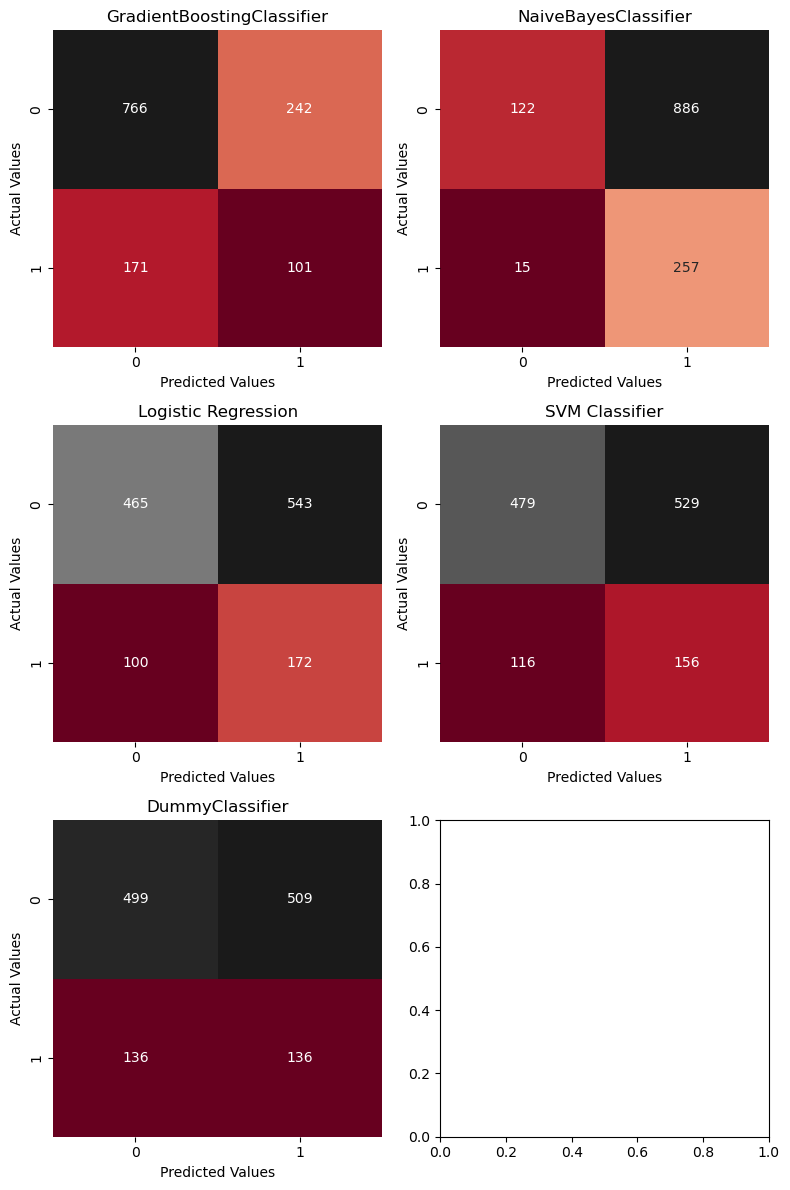

In [43]:
# Confusion Matrix
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8, 12))

# GradientBoostingClassifier
gradientBoost_cm = confusion_matrix(
    y_train, cross_val_predict(gradientBoost_clf, X_train, y_train, cv=10)
)
sns.heatmap(gradientBoost_cm, annot=True, fmt="", ax=ax1, cbar=False, cmap="RdGy")
ax1.set_title("GradientBoostingClassifier")
ax1.set_ylabel("Actual Values")
ax1.set_xlabel("Predicted Values")

# Naive Bayes
nb_cm = confusion_matrix(
    y_train, cross_val_predict(naivebayes_clf, X_train, y_train, cv=10)
)
sns.heatmap(nb_cm, annot=True, fmt="", ax=ax2, cbar=False, cmap="RdGy")
ax2.set_title("NaiveBayesClassifier")
ax2.set_ylabel("Actual Values")
ax2.set_xlabel("Predicted Values")

# Logistic Regression
logisticRegress_cm = confusion_matrix(
    y_train, cross_val_predict(logisticRegress_clf, X_train, y_train, cv=10)
)
sns.heatmap(logisticRegress_cm, annot=True, fmt="", ax=ax3, cbar=False, cmap="RdGy")
ax3.set_title("Logistic Regression")
ax3.set_ylabel("Actual Values")
ax3.set_xlabel("Predicted Values")

# SVM
svm_cm = confusion_matrix(
    y_train, cross_val_predict(svm_clf, X_train, y_train, cv=10)
)
sns.heatmap(svm_cm, annot=True, fmt="", ax=ax4, cbar=False, cmap="RdGy")
ax4.set_title("SVM Classifier")
ax4.set_ylabel("Actual Values")
ax4.set_xlabel("Predicted Values")

# Baseline
dummy_cm = confusion_matrix(y_train, cross_val_predict(dummy, X_train, y_train, cv=10))
sns.heatmap(dummy_cm, annot=True, fmt="", ax=ax5, cbar=False, cmap="RdGy")
ax5.set_title("DummyClassifier")
ax5.set_ylabel("Actual Values")
ax5.set_xlabel("Predicted Values")
plt.tight_layout()
plt.show()

<b>Observations:</b><br>
   - Since we are looking at F2 score, we need to see if FN is smaller than FP.<br>
   - For Dummy Classifier, it has as many TN predictions as FP predictions but FN predictions is still fewer than FP.<br>
   - For Gradient Boosting using Friedman_mse, model predictions for FN of 171 compared to the FP of 242, can predict data with minor errors but not as significant as the other 3 models.<br>
   - For Naive Bayes, model predictions for FN of 15 compared to the FP of 886, can predict data with minor errors.<br>
   - For Logisitc Regression, model predictions for FN of 100 compared to the FP of 543, can predict data with minor errors.<br>
   - For SVM, model predictions for FN of 116 compared to the FP of 529, can predict data with minor errors.<br>

# 5) Model Improvement

### <u>Hyperparameter Tuning (GridSearchCV)</u>
Run through the parameters to see which parameters give the best f2 score

Parameters to be tuned (GradientBoostingClassifier):
1. max_depth - maximum depth of the tree
2. max_leaf_nodes - max number of leaves nodes
3. n_estimators - numbers of trees in the forest
4. critertion - measures the quality {"friedman_mse", "squared_error"}

Parameters to be tuned (LogisticRegression):
1. max_iter - max number of iteration taken for solvers to converge
2. solver - algorithmn to use for the optimization problem {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}
3. C - inverse of regularization strength
4. penalty - penalty terms {‘l1’, ‘l2’, ‘elasticnet’, None}
5. l1_ratio - the Elastic-Net mixing parameter
    - 0 <= l1_ratio <= 1 for penalty='elasticnet'
    - l1_ratio = 0 for penalty='l2'
    - l1_ratio = 1 for penalty='l1'

Parameters to be tuned (Naive Bayes):
1. var_smoothing - largest variance of all features added  to variances for calculation stability

Parameters to be tuned (SVM):
1. C - regularization parameter
2. kernel - kernel type is used in the algorithm {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
3. degree - degree of the polynomial kernel function (‘poly’)

#### Why GridSearchCV and not RandomizedSearchCV?
- GridSearchCV exhaustively considers all hyperparameter combination but
- RandomizedSearchCV  can sample a given number of candidates from a hyperparameter space with a specified distribution.

#### Gradient Boosting Classifier

In [44]:
list(GradientBoostingClassifier().get_params().keys())

['ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [45]:
# Create the parameter grid
params_grid = {
    "max_depth": [5,10,20,30,40,50,60,70,80,90,100], 
    "max_leaf_nodes": np.arange(10, 16),
    "n_estimators": np.arange(50, 501, 50),
    "criterion": ["friedman_mse",'squared_error'] 
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        GradientBoostingClassifier(
            min_samples_split=2, min_samples_leaf=1
        ),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring=f2,
    ),
)

g_boost_random_search = Pipeline(steps=steps)
# Fitting Model
g_boost_random_search.fit(X_train, y_train)
print(g_boost_random_search.named_steps["hyper"].best_estimator_)
print(g_boost_random_search.named_steps["hyper"].best_params_)
print(g_boost_random_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 1320 candidates, totalling 13200 fits
GradientBoostingClassifier(max_depth=5, max_leaf_nodes=15, n_estimators=500)
{'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 15, 'n_estimators': 500}
0.9596078777676711


#### Logistic Regression

In [46]:
list(LogisticRegression().get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [47]:
import warnings
warnings.filterwarnings('ignore')

# Create the parameter grid
params_grid = {
    "max_iter": np.arange(100, 501, 100),
    "solver": ['newton-cholesky', 'saga', 'lbfgs', 'newton-cg', 'liblinear'],
    "C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'penalty':['l1','l2','elasticnet'],
    'l1_ratio': np.arange(0, 1.01, 0.02)
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        LogisticRegression(
            random_state=42
        ),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring=f2,
    ),
)

logisticRegress_search = Pipeline(steps=steps)
# Fitting Model
logisticRegress_search.fit(X_train, y_train)
print(logisticRegress_search.named_steps["hyper"].best_estimator_)
print(logisticRegress_search.named_steps["hyper"].best_params_)
print(logisticRegress_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 26775 candidates, totalling 267750 fits
LogisticRegression(C=0.01, l1_ratio=0.44, penalty='elasticnet', random_state=42,
                   solver='saga')
{'C': 0.01, 'l1_ratio': 0.44, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.7640289453992228


#### Naive Bayes

In [48]:
list(GaussianNB().get_params().keys())

['priors', 'var_smoothing']

In [49]:
# Create the parameter grid
params_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        GaussianNB(),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring=f2,
    ),
)

gaussian_search = Pipeline(steps=steps)
# Fitting Model
gaussian_search.fit(X_train, y_train)
print(gaussian_search.named_steps["hyper"].best_estimator_)
print(gaussian_search.named_steps["hyper"].best_params_)
print(gaussian_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
GaussianNB()
{'var_smoothing': 1e-09}
0.8099164400636507


#### SVC

In [50]:
list(SVC().get_params().keys())

['C',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'decision_function_shape',
 'degree',
 'gamma',
 'kernel',
 'max_iter',
 'probability',
 'random_state',
 'shrinking',
 'tol',
 'verbose']

In [51]:
# Create the parameter grid
params_grid = {
    "C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
    'degree':[2,3,4],
}

# Creating a model based on the pipeline
steps[model_step] = (
    "hyper",
    GridSearchCV(
        SVC(random_state=42),
        params_grid,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring=f2,
    ),
)

svc_search = Pipeline(steps=steps)
# Fitting Model
svc_search.fit(X_train, y_train)
print(svc_search.named_steps["hyper"].best_estimator_)
print(svc_search.named_steps["hyper"].best_params_)
print(svc_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
SVC(C=0.001, degree=4, kernel='poly', random_state=42)
{'C': 0.001, 'degree': 4, 'kernel': 'poly'}
0.8361134568123288


## Model Evaluation
- We will have to evaluate the model now again after hyperparameter tuning

### Initialize Model After Tuning

In [52]:
# GradientBoostingClassifier
steps[model_step] = (
    "model",
    g_boost_random_search.named_steps["hyper"].best_estimator_,
)

tuned_gradientBoost_clf = Pipeline(steps=steps)
# Fitting Model
tuned_gradientBoost_clf.fit(X_train, y_train)
# Predictions
gradientBoost_y_pred = tuned_gradientBoost_clf.predict(X_test)

In [53]:
# Logistic Regression
steps[model_step] = (
    "model",
    logisticRegress_search.named_steps["hyper"].best_estimator_,
)

tuned_logisticRegress_clf = Pipeline(steps=steps)
# Fitting Model
tuned_logisticRegress_clf.fit(X_train, y_train)
# Predictions
logisticRegress_y_pred = tuned_logisticRegress_clf.predict(X_test)

In [54]:
# Naive Bayes
steps[model_step] = (
    "model",
    gaussian_search.named_steps["hyper"].best_estimator_,
)

tuned_gaussian_clf = Pipeline(steps=steps)
# Fitting Model
tuned_gaussian_clf.fit(X_train, y_train)
# Predictions
gaussian_y_pred = tuned_gaussian_clf.predict(X_test)

In [55]:
# SVC
steps[model_step] = (
    "model",
    svc_search.named_steps["hyper"].best_estimator_,
)

tuned_svc_clf = Pipeline(steps=steps)
# Fitting Model
tuned_svc_clf.fit(X_train, y_train)
# Predictions
svc_y_pred = tuned_svc_clf.predict(X_test)

## Comparing Final Models
We shall use 2 evaluation metrics to evaluate the models based on their test data
1) Confusion Matrix - Determine the performance for each classifier based on the true values and false values
2) ROC Curve - Finds the performance of a classification model at all classification thresholds

### Confusion Matrix

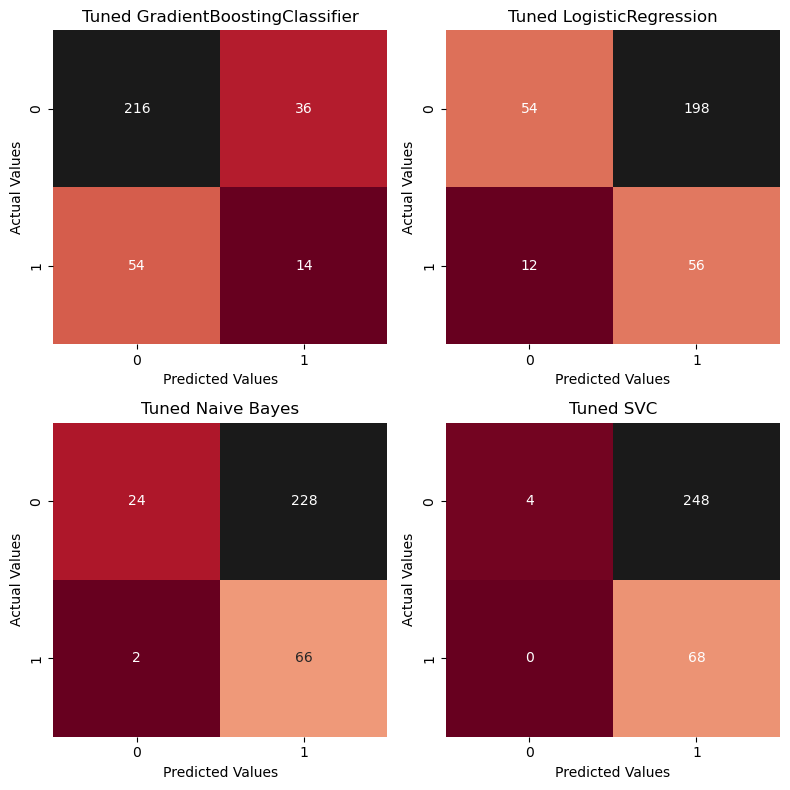

In [56]:
# Confusion Matrix
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8, 8))

# GradientBoostingClassifier
gradientBoost_tuned_cm = confusion_matrix(y_test, gradientBoost_y_pred)
sns.heatmap(gradientBoost_tuned_cm, annot=True, fmt="", ax=ax1, cbar=False, cmap="RdGy")
ax1.set_title("Tuned GradientBoostingClassifier", fontsize=12)
ax1.set_ylabel("Actual Values")
ax1.set_xlabel("Predicted Values")

# Logistic Regression
logisticRegress_tuned_cm = confusion_matrix(y_test, logisticRegress_y_pred)
sns.heatmap(logisticRegress_tuned_cm, annot=True, fmt="", ax=ax2, cbar=False, cmap="RdGy")
ax2.set_title("Tuned LogisticRegression", fontsize=12)
ax2.set_ylabel("Actual Values")
ax2.set_xlabel("Predicted Values")

# Naive Bayes
gaussian_tuned_cm = confusion_matrix(y_test, gaussian_y_pred)
sns.heatmap(gaussian_tuned_cm, annot=True, fmt="", ax=ax3, cbar=False, cmap="RdGy")
ax3.set_title("Tuned Naive Bayes", fontsize=12)
ax3.set_ylabel("Actual Values")
ax3.set_xlabel("Predicted Values")

# SVC
svc_tuned_cm = confusion_matrix(y_test, svc_y_pred)
sns.heatmap(svc_tuned_cm, annot=True, fmt="", ax=ax4, cbar=False, cmap="RdGy")
ax4.set_title("Tuned SVC", fontsize=12)
ax4.set_ylabel("Actual Values")
ax4.set_xlabel("Predicted Values")

plt.tight_layout()
plt.show()

<b>Observations:</b><br>
   - Even though the f2 score for logistic regression is high, a score of 0.96, it is not a good model to use as the FN prediction of 54 is greater than the FP prediction of 36, shows that it gives more weight to precision instead of recall.<br>
   - For the other models, the FN prediction are way lower than FP prediction, which shows that these able to predict whether the customer will default payment or not with high recall. <br>
   - Tuned SVC has a the lowest FN prediction compared to the other models hence it has the best F2 score.

### ROC Curve

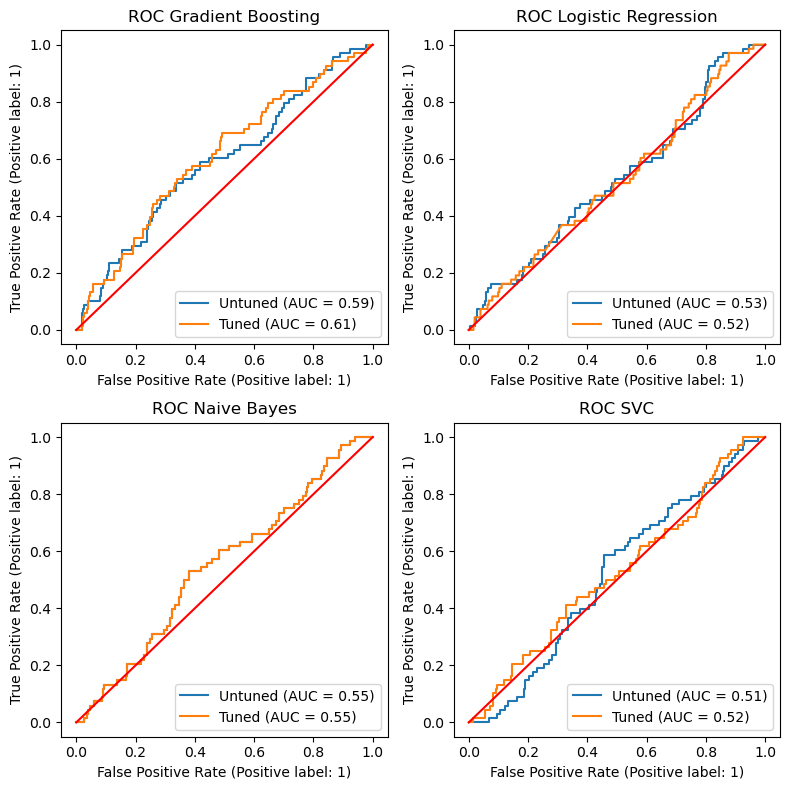

In [79]:
# ROC Curve
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

# Logistic Regression
RocCurveDisplay.from_estimator(gradientBoost_clf, X_test, y_test, ax=ax1, name="Untuned")
RocCurveDisplay.from_estimator(tuned_gradientBoost_clf, X_test, y_test, ax=ax1, name="Tuned")

# Logistic Regression
RocCurveDisplay.from_estimator(logisticRegress_clf, X_test, y_test, ax=ax2, name="Untuned")
RocCurveDisplay.from_estimator(tuned_logisticRegress_clf, X_test, y_test, ax=ax2, name="Tuned")

# Naive Bayes
RocCurveDisplay.from_estimator(naivebayes_clf, X_test, y_test, ax=ax3, name="Untuned")
RocCurveDisplay.from_estimator(tuned_gaussian_clf, X_test, y_test, ax=ax3, name="Tuned")

# SVC
RocCurveDisplay.from_estimator(svm_clf, X_test, y_test, ax=ax4, name="Untuned")
RocCurveDisplay.from_estimator(tuned_svc_clf, X_test, y_test, ax=ax4, name="Tuned")

#50% Line
x = np.linspace(0,1,2)
ax1.plot(x,x,color="red")
ax2.plot(x,x,color="red")
ax3.plot(x,x,color="red")
ax4.plot(x,x,color="red")

ax1.set_title("ROC Gradient Boosting")
ax2.set_title("ROC Logistic Regression")
ax3.set_title("ROC Naive Bayes")
ax4.set_title("ROC SVC")

plt.tight_layout()
plt.show()

<b>Observations:</b><br>
   - Overall, as there is an imbalanced set of data where more customer will choose not to default payment than default payment, the AUC-ROC is weak for all 3 models as a result<br>
   - Naive Bayes has a similar ROC for untuned and tuned as the parameter chose the default value even after tuning but still has the best performance than the other 2 tuned models. <br>
   - ROC_AUC of SVC improved a little after tuning<br>
   - Overall, even though from the confusion matrix, we have determined that SVC has the best f2 score, it does not have a better roc_auc score compared to Naive Bayes which makes SVC less reliable than Naive Bayes

In [58]:
#Classification Report
# print(f'Logistic Regression:\n{classification_report(y_test, logisticRegress_y_pred, digits=3)}')
# print(f'Naive Bayes:\n{classification_report(y_test, gaussian_y_pred, digits=3)}')
# print(f'SVM:\n{classification_report(y_test,svc_y_pred , digits=3)}')

In [77]:
#Show the F2 scores & Balanced Accuracy of test data

pd.DataFrame([
    [balanced_accuracy_score(y_test,logisticRegress_y_pred),
     balanced_accuracy_score(y_test, gaussian_y_pred),
     balanced_accuracy_score(y_test, svc_y_pred)]],
    columns=["Logisitc Regression", "Naive Bayes", "SVC"],
    index=["Balanced Accuracy"],
)

Logisitc Regression  Naive Bayes       SVC
Balanced Accuracy             0.518908     0.532913  0.507937

<b>Observations:</b><br>
  - Based on the balanced accuracy score, Naive Bayes performed the best.
  - Shows that Naive Bayes is the best at predicting whether the customer will default payment or not.

### Feature Importance
- Find out which features the model considers important using Gradient Boosting as it is an ensemble model
- Only Gradient Boosting is able to determine feature importance

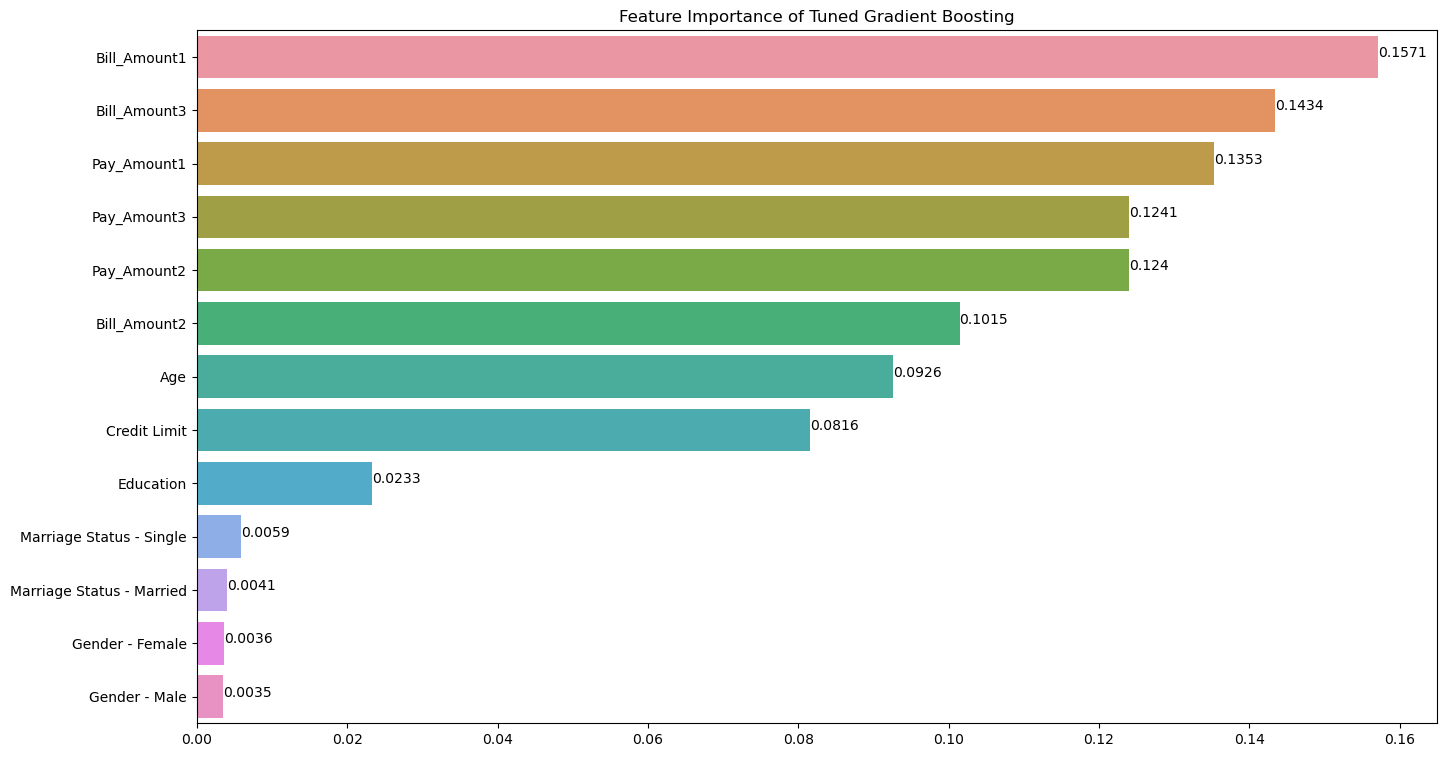

In [68]:
feature_names=["Gender - Female","Gender - Male",  "Marriage Status - Married",  "Marriage Status - Single", "Education", 
               'Credit Limit', 'Age', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1','Pay_Amount2', 'Pay_Amount3']

# Create feature importance and sort the features based on the coefficient
importance = pd.Series(
tuned_gradientBoost_clf[-1].feature_importances_, index=feature_names
).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(
    x=importance.values, y=importance.index, ax=ax
)
ax.set_title("Feature Importance of Tuned {}".format("Gradient Boosting"))

for i, v in zip(np.arange(0, len(importance)), importance.values):
        ax.text(x=v, y=i, s=round(v, 4))

plt.show()

<b>Observations:</b><br>
  - Top 3 features Gradient Boosting has considered most important are Bill_Amount1, Bill_Amount3 and Pay_Amount1

### <u>Saving Models</u>

In [78]:
pickle.dump(tuned_gaussian_clf, open("NaiveBayes.p", "wb"))

# 6) Summary
Naive Bayes is the best model based on the balanced_auc score & roc_auc score. It has quite a strong f2 score which show that the model is performing well for both precision and recall, with higher emphasis on recall. Naive Bayes stike a good balance between correctly identifying customers who will default and minimizing the number of customers falsely predicted to default.